In [1]:
# import those beauties
import pandas as pd
import geopandas as gpd
import geopy
from geopandas.tools import geocode
import contextily as ctx
from geopy.geocoders import Nominatim
import csv
import shapely
import matplotlib.pyplot as plt
import matplotlib.colors 
import numpy as np
import math
from geopandas import GeoDataFrame
from shapely.geometry import Polygon, Point

# import and merge datasets

In [2]:
real = pd.read_csv('/Users/trevorban/Desktop/ames_project/Machine Learning Project Proposal/data/Ames_Real_Estate_Data.csv')

/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
housing = pd.read_csv("/Users/trevorban/Desktop/ames_project/Machine Learning Project Proposal/data/Ames_Housing_Price_Data.csv")

In [4]:
df1 = housing.merge(real, how='left', left_on = ['PID'], right_on = 'MapRefNo')

# define those fine functions


In [5]:
def too_far(x):
    df = pd.DataFrame(x)
    df2 = pd.DataFrame()
    for i in range(len(x)):
        if float(df.iloc[[i]]['lon']) > -93.72 and float(df.iloc[[i]]['lon']) < -93.56 and float(df.iloc[[i]]['lat']) < 42.08 and float(df.iloc[[i]]['lat']) > 41.98:
            df2 = df2.append(df.iloc[[i]])
    #print("too_far removed rows:" + str(len(df) - len(df2)))
    return(GeoDataFrame(df2))

def find_dist(a, b):
    x = float(a['lon']) - float(b['lon'])
    y = float(a['lat']) - float(b['lat'])
    dist = math.sqrt(x**2 + y**2)
    return dist

def remove_empty(x):
    df = pd.DataFrame(x)
    df2 = pd.DataFrame()
    for i in range(len(x)):
        if len(str(df.iloc[[i]]['address_x'])) > 50:
            df2 = df2.append(df.iloc[[i]])
    #print("remove_empty removed rows:" + str(len(df) - len(df2)))
    return GeoDataFrame(df2)

def remove_empty_name(x):
    df = pd.DataFrame(x)
    df2 = pd.DataFrame()
    for i in range(len(x)):
        if len(str(df.iloc[[i]]['name'])) > 39:
            df2 = df2.append(df.iloc[[i]])
    #print("removed rows:" + str(len(df) - len(df2)))
    return GeoDataFrame(df2)

def nearest_park(x):
    pass

def lon_lat(df):
    #df['lon'] = df.geometry.apply(lambda p: p.x)
    #df['lat'] = df.geometry.apply(lambda p: p.y)
    pass

# make address column and find coordinates

In [6]:
df1 = df1[['MapRefNo', 'Prop_Addr', 'MA_Zip1', 'MA_City', 'MA_State', 'PID', 'Neighborhood_x', 'SalePrice_x']]

In [7]:
df1['address'] = df1['Prop_Addr'] + " " + df1['MA_City']

In [8]:
# miniaturize for easier testing
# df1 = df1.head(50)
# df1

In [9]:
# find coordinates for houses in merged dataset
geo = geocode(df1['address'], provider='nominatim', user_agent='autogis_xx', timeout=4)

# clean up errors in housing coordinates

In [16]:
df = geo.copy()

In [17]:
df

,geometry,address
0,POINT (-93.65162 42.01856),"436, Hayward Avenue, Campustown, Ames, Story C..."
1,POINT (-93.66367 42.02486),"3416, West Street, Union Drive, Ames, Story Co..."
2,POINT (-93.66367 42.02486),"3416, West Street, Union Drive, Ames, Story Co..."
3,POINT (-93.61407 42.02155),"320, South 2nd Street, Ames, Story County, Iow..."
4,POINT (-93.61221 42.03739),"1524, Douglas Avenue, Broadmoor, Ames, Story C..."
...,...,...
2619,POINT (-93.62637 42.03210),"1021, Ridgewood Avenue, Ridgewood, Ames, Story..."
2620,POINT (-93.66614 42.02767),"3619, Mary Circle, Ames, Story County, Iowa, 5..."
2621,GEOMETRYCOLLECTION EMPTY,None
2622,POINT (-93.68975 42.01680),"5319, Clemens Boulevard, Bentwood, Ames, Story..."


In [18]:
df = pd.merge(df, df1, left_index=True, right_index=True)

In [19]:
df

,geometry,address_x,MapRefNo,Prop_Addr,MA_Zip1,MA_City,MA_State,PID,Neighborhood_x,SalePrice_x,address_y
0,POINT (-93.65162 42.01856),"436, Hayward Avenue, Campustown, Ames, Story C...",909176150.0,436 HAYWARD AVE,50010.0,AMES,IA,909176150,SWISU,126000,436 HAYWARD AVE AMES
1,POINT (-93.66367 42.02486),"3416, West Street, Union Drive, Ames, Story Co...",905476230.0,3416 WEST ST,50014.0,AMES,IA,905476230,Edwards,139500,3416 WEST ST AMES
2,POINT (-93.66367 42.02486),"3416, West Street, Union Drive, Ames, Story Co...",905476230.0,3416 WEST ST,50014.0,AMES,IA,905476230,Edwards,139500,3416 WEST ST AMES
3,POINT (-93.61407 42.02155),"320, South 2nd Street, Ames, Story County, Iow...",911128020.0,320 S 2ND ST,50010.0,AMES,IA,911128020,IDOTRR,124900,320 S 2ND ST AMES
4,POINT (-93.61221 42.03739),"1524, Douglas Avenue, Broadmoor, Ames, Story C...",535377150.0,1524 DOUGLAS AVE,50010.0,AMES,IA,535377150,OldTown,114000,1524 DOUGLAS AVE AMES
...,...,...,...,...,...,...,...,...,...,...,...
2619,POINT (-93.62637 42.03210),"1021, Ridgewood Avenue, Ridgewood, Ames, Story...",903205040.0,1021 RIDGEWOOD AVE,50010.0,AMES,IA,903205040,BrkSide,121000,1021 RIDGEWOOD AVE AMES
2620,POINT (-93.66614 42.02767),"3619, Mary Circle, Ames, Story County, Iowa, 5...",905402060.0,3619 MARY CIR,50014.0,AMES,IA,905402060,Edwards,139600,3619 MARY CIR AMES
2621,GEOMETRYCOLLECTION EMPTY,None,909275030.0,2140 SUNSET DR 2142,16801.0,STATE COLLEGE,PA,909275030,Crawfor,145000,2140 SUNSET DR 2142 STATE COLLEGE
2622,POINT (-93.68975 42.01680),"5319, Clemens Boulevard, Bentwood, Ames, Story...",907192040.0,5319 CLEMENS BLVD,50014.0,AMES,IA,907192040,CollgCr,217500,5319 CLEMENS BLVD AMES


In [20]:
# remove empty rows (if coordinates were not found)
df = remove_empty(df)
# split geometry into lon and lat columns
df['lon'] = df.geometry.apply(lambda p: p.x)
df['lat'] = df.geometry.apply(lambda p: p.y)
# remove addresses outside of the scope of the map
df = too_far(df)

In [21]:
df

,geometry,address_x,MapRefNo,Prop_Addr,MA_Zip1,MA_City,MA_State,PID,Neighborhood_x,SalePrice_x,address_y,lon,lat
0,POINT (-93.65162 42.01856),"436, Hayward Avenue, Campustown, Ames, Story C...",909176150.0,436 HAYWARD AVE,50010.0,AMES,IA,909176150,SWISU,126000,436 HAYWARD AVE AMES,-93.651619,42.018564
1,POINT (-93.66367 42.02486),"3416, West Street, Union Drive, Ames, Story Co...",905476230.0,3416 WEST ST,50014.0,AMES,IA,905476230,Edwards,139500,3416 WEST ST AMES,-93.663671,42.024855
2,POINT (-93.66367 42.02486),"3416, West Street, Union Drive, Ames, Story Co...",905476230.0,3416 WEST ST,50014.0,AMES,IA,905476230,Edwards,139500,3416 WEST ST AMES,-93.663671,42.024855
3,POINT (-93.61407 42.02155),"320, South 2nd Street, Ames, Story County, Iow...",911128020.0,320 S 2ND ST,50010.0,AMES,IA,911128020,IDOTRR,124900,320 S 2ND ST AMES,-93.614068,42.021548
4,POINT (-93.61221 42.03739),"1524, Douglas Avenue, Broadmoor, Ames, Story C...",535377150.0,1524 DOUGLAS AVE,50010.0,AMES,IA,535377150,OldTown,114000,1524 DOUGLAS AVE AMES,-93.612207,42.037391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,POINT (-93.67275 42.01901),"4019, Marigold Drive, South Forks, Ames, Story...",908128100.0,4019 MARIGOLD DR,50014.0,AMES,IA,908128100,Edwards,196500,4019 MARIGOLD DR AMES,-93.672746,42.019007
2619,POINT (-93.62637 42.03210),"1021, Ridgewood Avenue, Ridgewood, Ames, Story...",903205040.0,1021 RIDGEWOOD AVE,50010.0,AMES,IA,903205040,BrkSide,121000,1021 RIDGEWOOD AVE AMES,-93.626373,42.032102
2620,POINT (-93.66614 42.02767),"3619, Mary Circle, Ames, Story County, Iowa, 5...",905402060.0,3619 MARY CIR,50014.0,AMES,IA,905402060,Edwards,139600,3619 MARY CIR AMES,-93.666138,42.027669
2622,POINT (-93.68975 42.01680),"5319, Clemens Boulevard, Bentwood, Ames, Story...",907192040.0,5319 CLEMENS BLVD,50014.0,AMES,IA,907192040,CollgCr,217500,5319 CLEMENS BLVD AMES,-93.689748,42.016802


# import shp files and subdivide files

In [22]:
# waterways = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/waterways.shp')
# roads = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/roads.shp')
# railways = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/railways.shp')
# places = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/places.shp')
# buildings = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/buildings.shp')
# landuse = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/landuse.shp')
# natural = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/natural.shp')
# points = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/points.shp')

# fig,ax = plt.subplots(figsize=(15,15))
# waterways.plot(ax = ax, color='red')
# roads.plot(ax = ax, color='black')
# railways.plot(ax = ax, color='red')
# places.plot(ax = ax, color='purple')
# buildings.plot(ax = ax, color='blue')
# landuse.plot(ax = ax, color='purple')
# natural.plot(ax = ax, color='green')
# points.plot(ax = ax, color='black')

In [23]:
waterways = gpd.read_file('/Users/trevorban/Downloads/ames-shp2/shape/waterways.shp')
roads = gpd.read_file('/Users/trevorban/Downloads/ames-shp2/shape/roads.shp')
railways = gpd.read_file('/Users/trevorban/Downloads/ames-shp2/shape/railways.shp')
places = gpd.read_file('/Users/trevorban/Downloads/ames-shp2/shape/places.shp')
buildings = gpd.read_file('/Users/trevorban/Downloads/ames-shp2/shape/buildings.shp')
landuse = gpd.read_file('/Users/trevorban/Downloads/ames-shp2/shape/landuse.shp')
natural = gpd.read_file('/Users/trevorban/Downloads/ames-shp2/shape/natural.shp')
points = gpd.read_file('/Users/trevorban/Downloads/ames-shp2/shape/points.shp')

# subdivide nature category
nwater = natural[natural['type'] == 'water']
npark = natural[natural['type'] == 'park']
nforest = natural[natural['type'] == 'forest']

# subdivide places category
iowa_state_center = places[places['name'] == 'Iowa State Center']

# find coordinates for particular features
ISU = geocode('901 Stange Rd, Ames, IA 50011', provider='nominatim', user_agent='autogis_xx', timeout=4)
ames_high = geocode('1921 Ames High Dr, Ames, IA 50010', provider='nominatim', user_agent='autogis_xx', timeout=4)

# visualiiiiiiize

<AxesSubplot:>

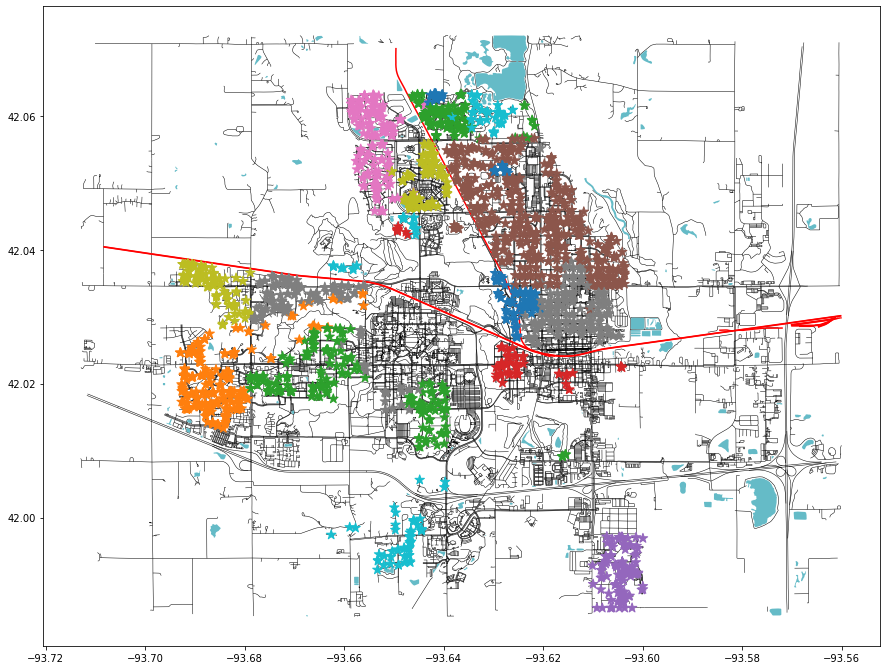

In [24]:
fig,ax = plt.subplots(figsize=(15,15))
df.plot(ax=ax, column=df['Neighborhood_x'], marker='*', markersize=100,zorder=2)
#waterways.plot(ax = ax, color='blue', linewidth=.3)
roads.plot(ax=ax, color='black', linewidth=0.5, zorder=1)
railways.plot(ax = ax, color='red', zorder=1)
#places.plot(ax = ax, color='purple', column='type', legend=True)
#buildings.plot(ax = ax, color='blue')
#landuse.plot(ax = ax, color='purple')
#points.plot(ax = ax, color='black')
nwater.plot(ax=ax, color='#65bbc7', zorder=1)
#nforest.plot(ax=ax, color='green', zorder=1)
#npark.plot(ax=ax, color='#8B0000', zorder=1)
#ISU.plot(ax=ax, color = '#f47920', markersize=100, zorder=2)
# iowa_state_center.plot(ax=ax, color = '#f47920', markersize=100)
# ames_high.plot(ax=ax, color = '#f47920', markersize=100, categorical=True,
#              legend=True)

# explore neighborhood proximity

In [25]:
# split geometry into lon and lat columns
places['lon'] = places.geometry.apply(lambda p: p.x)
places['lat'] = places.geometry.apply(lambda p: p.y)
places

,osm_id,name,type,population,geometry,lon,lat
0,151883827,Ames,city,66191.0,POINT (-93.61706 42.02677),-93.617055,42.026770
1,151885207,Ontario,hamlet,NaN,POINT (-93.68161 42.03582),-93.681609,42.035819
2,-1606136215,Iowa State Center,neighbourhood,NaN,POINT (-93.63642 42.02038),-93.636416,42.020376
3,-63652251,Schilletter-University Village,neighbourhood,NaN,POINT (-93.64239 42.04395),-93.642386,42.043946
4,-59540145,Somerset,neighbourhood,NaN,POINT (-93.64520 42.04959),-93.645204,42.049586
5,50477166,Frederiksen Court,neighbourhood,NaN,POINT (-93.64167 42.03390),-93.641668,42.033905
6,50477167,Union Drive,neighbourhood,NaN,POINT (-93.65136 42.02423),-93.651360,42.024229
7,50477168,Richardson Court,neighbourhood,NaN,POINT (-93.64203 42.02421),-93.642025,42.024207


# explore park proximity

In [26]:
npark.head()

,osm_id,name,type,geometry
1,44804362,Moore Memorial Park,park,"POLYGON ((-93.64954 42.04537, -93.64954 42.045..."
2,44806238,Brookside Park,park,"POLYGON ((-93.63270 42.02849, -93.63212 42.028..."
3,44806530,Ioway Creek Park,park,"POLYGON ((-93.62175 42.01575, -93.62203 42.015..."
4,44807182,Stuart Smith Park,park,"POLYGON ((-93.63219 42.01635, -93.63173 42.016..."
34,78137196,Sleepy Hollow Canoe Access,park,"POLYGON ((-93.62008 42.06565, -93.61995 42.065..."


In [27]:
newpark = remove_empty_name(npark)

In [28]:
def dist_to_park(parks, x):
#     for i in x.iterrows():
#         a = []
#         for e in parks.iterrows():
#             a.append(e[1]['geometry'].distance(i[1]['geometry'])[0])
#             print(min(a))
    pass
        

In [29]:
newpark = newpark.to_crs(4326)
ISU = ISU.to_crs(4326)

In [30]:
park_house_dist_df = newpark.geometry.apply(lambda g: df.distance(g))
park_house_dist_df

/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,2613,2614,2615,2616,2617,2618,2619,2620,2622,2623
1,0.023179,0.019473,0.019473,0.040770,0.037251,0.017106,0.029635,0.038410,0.019607,0.071804,...,0.016258,0.017499,0.017119,0.025727,0.025428,0.029483,0.025042,0.018600,0.043165,0.028868
2,0.019417,0.028516,0.028516,0.013506,0.017121,0.010010,0.038885,0.014563,0.029433,0.046118,...,0.024966,0.034692,0.035874,0.036711,0.007742,0.038653,0.002359,0.030665,0.055675,0.046758
3,0.026530,0.039308,0.039308,0.005076,0.020566,0.028220,0.047896,0.014466,0.048987,0.032187,...,0.044553,0.047674,0.049636,0.046923,0.021902,0.047655,0.015015,0.042341,0.064622,0.058902
4,0.018751,0.030171,0.030171,0.014329,0.019460,0.016501,0.039889,0.016497,0.036435,0.040250,...,0.031971,0.036805,0.038389,0.038324,0.013341,0.039649,0.005837,0.032510,0.056782,0.048763
34,0.055466,0.057868,0.057868,0.044236,0.029051,0.023286,0.068613,0.035018,0.018646,0.080568,...,0.018865,0.057283,0.056855,0.064917,0.026352,0.068439,0.033706,0.057708,0.082900,0.068463
36,0.041835,0.053240,0.053240,0.005708,0.010548,0.027656,0.062929,0.004673,0.047805,0.039804,...,0.043898,0.059877,0.061326,0.061303,0.018150,0.062690,0.016718,0.055687,0.079833,0.071923
42,0.002762,0.006253,0.006253,0.040294,0.045302,0.032756,0.014104,0.043064,0.044382,0.060170,...,0.040561,0.016649,0.019289,0.012980,0.035587,0.013864,0.030185,0.009968,0.030975,0.025701
51,0.051242,0.064832,0.064832,0.026786,0.041770,0.055073,0.071217,0.035703,0.076187,0.007357,...,0.071888,0.074365,0.076621,0.071398,0.046783,0.070988,0.041547,0.068305,0.086706,0.084481
52,0.043484,0.053225,0.053225,0.013978,0.001893,0.022207,0.063626,0.004262,0.040859,0.049312,...,0.037264,0.058566,0.059682,0.061430,0.012916,0.063393,0.015231,0.055188,0.080423,0.070851
54,0.026448,0.038724,0.038724,0.009764,0.020488,0.024979,0.047806,0.015486,0.045840,0.038450,...,0.041421,0.046590,0.048423,0.046552,0.018707,0.047565,0.011693,0.041570,0.064615,0.058108


In [31]:
for i, row in df.iterrows():
    df.at[i,'nearest_park'] = park_house_dist_df[i].min()

In [32]:
df

,geometry,address_x,MapRefNo,Prop_Addr,MA_Zip1,MA_City,MA_State,PID,Neighborhood_x,SalePrice_x,address_y,lon,lat,nearest_park
0,POINT (-93.65162 42.01856),"436, Hayward Avenue, Campustown, Ames, Story C...",909176150.0,436 HAYWARD AVE,50010.0,AMES,IA,909176150,SWISU,126000,436 HAYWARD AVE AMES,-93.651619,42.018564,0.002762
1,POINT (-93.66367 42.02486),"3416, West Street, Union Drive, Ames, Story Co...",905476230.0,3416 WEST ST,50014.0,AMES,IA,905476230,Edwards,139500,3416 WEST ST AMES,-93.663671,42.024855,0.003689
2,POINT (-93.66367 42.02486),"3416, West Street, Union Drive, Ames, Story Co...",905476230.0,3416 WEST ST,50014.0,AMES,IA,905476230,Edwards,139500,3416 WEST ST AMES,-93.663671,42.024855,0.003689
3,POINT (-93.61407 42.02155),"320, South 2nd Street, Ames, Story County, Iow...",911128020.0,320 S 2ND ST,50010.0,AMES,IA,911128020,IDOTRR,124900,320 S 2ND ST AMES,-93.614068,42.021548,0.003296
4,POINT (-93.61221 42.03739),"1524, Douglas Avenue, Broadmoor, Ames, Story C...",535377150.0,1524 DOUGLAS AVE,50010.0,AMES,IA,535377150,OldTown,114000,1524 DOUGLAS AVE AMES,-93.612207,42.037391,0.001893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,POINT (-93.67275 42.01901),"4019, Marigold Drive, South Forks, Ames, Story...",908128100.0,4019 MARIGOLD DR,50014.0,AMES,IA,908128100,Edwards,196500,4019 MARIGOLD DR AMES,-93.672746,42.019007,0.003338
2619,POINT (-93.62637 42.03210),"1021, Ridgewood Avenue, Ridgewood, Ames, Story...",903205040.0,1021 RIDGEWOOD AVE,50010.0,AMES,IA,903205040,BrkSide,121000,1021 RIDGEWOOD AVE AMES,-93.626373,42.032102,0.002359
2620,POINT (-93.66614 42.02767),"3619, Mary Circle, Ames, Story County, Iowa, 5...",905402060.0,3619 MARY CIR,50014.0,AMES,IA,905402060,Edwards,139600,3619 MARY CIR AMES,-93.666138,42.027669,0.001984
2622,POINT (-93.68975 42.01680),"5319, Clemens Boulevard, Bentwood, Ames, Story...",907192040.0,5319 CLEMENS BLVD,50014.0,AMES,IA,907192040,CollgCr,217500,5319 CLEMENS BLVD AMES,-93.689748,42.016802,0.002338


In [33]:
#df2 = pd.merge(df, housing, left_index=True, right_index=True)

Text(0.5, 1.0, 'sale price against distance to nearest park')

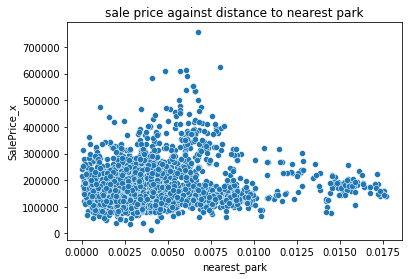

In [34]:
import seaborn as sns
x = sns.scatterplot(x=df.nearest_park, y=df.SalePrice_x)
x.set_title('sale price against distance to nearest park')

Quick thoughts on my work so far:

This entire notebook has been focused on using geopandas for both visualizations and feature engineering.  The features I was most excited about was 1. distance to nearest park and 2. neighborhood.  First I had to find the coordinates for each house using geocode.  This led to several errors, and about 100 houses were removed from this df because they were either missing or outside of the bounds of the map (either a null or an error).  With the remaining houses, I graphed their sale price with distance to nearest park.  The above graph shows very little impact on saleprice by park proximity.  My next venture with park proximity will be to narrow it down to proximity to particular parks, possibly only parks over a certain size.  The next concern here will be likely multicolinearity with the neighborhood feature.  Proximity to certain parks may just be another way of saying, 'is in x neighborhood'.  



In [35]:
ISU_dist_df = ISU.geometry.apply(lambda g: df.distance(g))
ISU_dist_df

/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,2613,2614,2615,2616,2617,2618,2619,2620,2622,2623
0,0.013506,0.01966,0.01966,0.031875,0.033329,0.019325,0.030372,0.032202,0.033245,0.060009,...,0.029041,0.025439,0.02698,0.02786,0.02271,0.030149,0.018475,0.021538,0.04695,0.037509


In [36]:
for i, row in df.iterrows():
    df.at[i,'ISU_distance'] = park_house_dist_df[i].min()

In [37]:
df

,geometry,address_x,MapRefNo,Prop_Addr,MA_Zip1,MA_City,MA_State,PID,Neighborhood_x,SalePrice_x,address_y,lon,lat,nearest_park,ISU_distance
0,POINT (-93.65162 42.01856),"436, Hayward Avenue, Campustown, Ames, Story C...",909176150.0,436 HAYWARD AVE,50010.0,AMES,IA,909176150,SWISU,126000,436 HAYWARD AVE AMES,-93.651619,42.018564,0.002762,0.002762
1,POINT (-93.66367 42.02486),"3416, West Street, Union Drive, Ames, Story Co...",905476230.0,3416 WEST ST,50014.0,AMES,IA,905476230,Edwards,139500,3416 WEST ST AMES,-93.663671,42.024855,0.003689,0.003689
2,POINT (-93.66367 42.02486),"3416, West Street, Union Drive, Ames, Story Co...",905476230.0,3416 WEST ST,50014.0,AMES,IA,905476230,Edwards,139500,3416 WEST ST AMES,-93.663671,42.024855,0.003689,0.003689
3,POINT (-93.61407 42.02155),"320, South 2nd Street, Ames, Story County, Iow...",911128020.0,320 S 2ND ST,50010.0,AMES,IA,911128020,IDOTRR,124900,320 S 2ND ST AMES,-93.614068,42.021548,0.003296,0.003296
4,POINT (-93.61221 42.03739),"1524, Douglas Avenue, Broadmoor, Ames, Story C...",535377150.0,1524 DOUGLAS AVE,50010.0,AMES,IA,535377150,OldTown,114000,1524 DOUGLAS AVE AMES,-93.612207,42.037391,0.001893,0.001893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,POINT (-93.67275 42.01901),"4019, Marigold Drive, South Forks, Ames, Story...",908128100.0,4019 MARIGOLD DR,50014.0,AMES,IA,908128100,Edwards,196500,4019 MARIGOLD DR AMES,-93.672746,42.019007,0.003338,0.003338
2619,POINT (-93.62637 42.03210),"1021, Ridgewood Avenue, Ridgewood, Ames, Story...",903205040.0,1021 RIDGEWOOD AVE,50010.0,AMES,IA,903205040,BrkSide,121000,1021 RIDGEWOOD AVE AMES,-93.626373,42.032102,0.002359,0.002359
2620,POINT (-93.66614 42.02767),"3619, Mary Circle, Ames, Story County, Iowa, 5...",905402060.0,3619 MARY CIR,50014.0,AMES,IA,905402060,Edwards,139600,3619 MARY CIR AMES,-93.666138,42.027669,0.001984,0.001984
2622,POINT (-93.68975 42.01680),"5319, Clemens Boulevard, Bentwood, Ames, Story...",907192040.0,5319 CLEMENS BLVD,50014.0,AMES,IA,907192040,CollgCr,217500,5319 CLEMENS BLVD AMES,-93.689748,42.016802,0.002338,0.002338


Text(0.5, 1.0, 'sale price against distance to ISU')

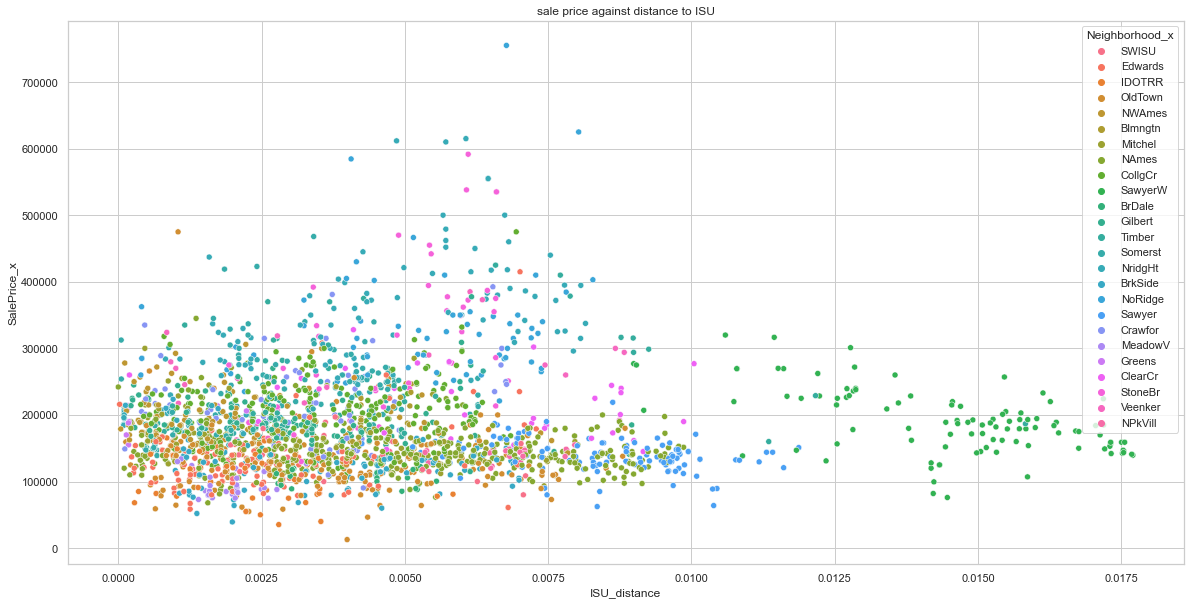

In [72]:
f, ax = plt.subplots(figsize=(20, 10))
x = sns.scatterplot(x=df.ISU_distance, y=df.SalePrice_x, hue=df['Neighborhood_x'])
#plt.xlim(0, .01)
x.set_title('sale price against distance to ISU')


Text(0.5, 1.0, 'sale price against longitude')

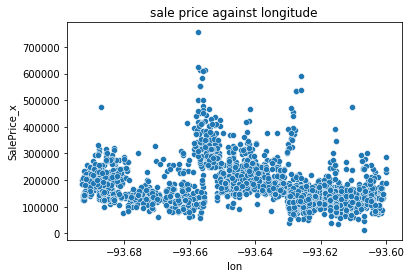

In [39]:
x = sns.scatterplot(x=df.lon, y=df.SalePrice_x)
x.set_title('sale price against longitude')

Text(0.5, 1.0, 'sale price against latitude')

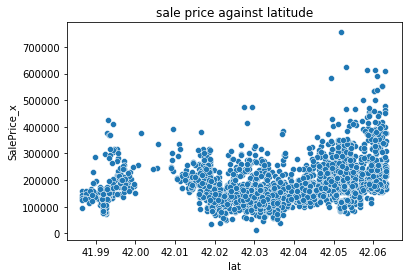

In [40]:
x = sns.scatterplot(x=df.lat, y=df.SalePrice_x)
x.set_title('sale price against latitude')

# limit search to only large parks

In [41]:
newpark["area"] = newpark['geometry'].area
newpark.sort_values('area', ascending=False)
largepark = newpark.sort_values('area', ascending=False).head(5)
largepark

/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


,osm_id,name,type,geometry,area
2,44806238,Brookside Park,park,"POLYGON ((-93.63270 42.02849, -93.63212 42.028...",0.000042
4,44807182,Stuart Smith Park,park,"POLYGON ((-93.63219 42.01635, -93.63173 42.016...",0.000038
413,921759082,Izaak Walton League Park,park,"POLYGON ((-93.59520 42.04553, -93.58620 42.045...",0.000033
1,44804362,Moore Memorial Park,park,"POLYGON ((-93.64954 42.04537, -93.64954 42.045...",0.000022
65,188427943,North River Valley Park,park,"POLYGON ((-93.59717 42.03713, -93.59710 42.037...",0.000021


In [42]:
large_park_house_dist_df = largepark.geometry.apply(lambda g: df.distance(g))
large_park_house_dist_df

/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,2613,2614,2615,2616,2617,2618,2619,2620,2622,2623
2,0.019417,0.028516,0.028516,0.013506,0.017121,0.010010,0.038885,0.014563,0.029433,0.046118,...,0.024966,0.034692,0.035874,0.036711,0.007742,0.038653,0.002359,0.030665,0.055675,0.046758
4,0.018751,0.030171,0.030171,0.014329,0.019460,0.016501,0.039889,0.016497,0.036435,0.040250,...,0.031971,0.036805,0.038389,0.038324,0.013341,0.039649,0.005837,0.032510,0.056782,0.048763
413,0.062286,0.071509,0.071509,0.028569,0.018828,0.036633,0.082166,0.021520,0.049652,0.056014,...,0.047308,0.075807,0.076586,0.079698,0.029379,0.081939,0.033919,0.073140,0.098801,0.088137
1,0.023179,0.019473,0.019473,0.040770,0.037251,0.017106,0.029635,0.038410,0.019607,0.071804,...,0.016258,0.017499,0.017119,0.025727,0.025428,0.029483,0.025042,0.018600,0.043165,0.028868
65,0.050939,0.061194,0.061194,0.016900,0.008937,0.029237,0.071447,0.009904,0.045767,0.048035,...,0.042659,0.066774,0.067900,0.069387,0.020643,0.071212,0.023254,0.063265,0.088300,0.079041


In [43]:
for i, row in df.iterrows():
    df.at[i,'nearest_large_park'] = large_park_house_dist_df[i].min()

In [44]:
df

,geometry,address_x,MapRefNo,Prop_Addr,MA_Zip1,MA_City,MA_State,PID,Neighborhood_x,SalePrice_x,address_y,lon,lat,nearest_park,ISU_distance,nearest_large_park
0,POINT (-93.65162 42.01856),"436, Hayward Avenue, Campustown, Ames, Story C...",909176150.0,436 HAYWARD AVE,50010.0,AMES,IA,909176150,SWISU,126000,436 HAYWARD AVE AMES,-93.651619,42.018564,0.002762,0.002762,0.018751
1,POINT (-93.66367 42.02486),"3416, West Street, Union Drive, Ames, Story Co...",905476230.0,3416 WEST ST,50014.0,AMES,IA,905476230,Edwards,139500,3416 WEST ST AMES,-93.663671,42.024855,0.003689,0.003689,0.019473
2,POINT (-93.66367 42.02486),"3416, West Street, Union Drive, Ames, Story Co...",905476230.0,3416 WEST ST,50014.0,AMES,IA,905476230,Edwards,139500,3416 WEST ST AMES,-93.663671,42.024855,0.003689,0.003689,0.019473
3,POINT (-93.61407 42.02155),"320, South 2nd Street, Ames, Story County, Iow...",911128020.0,320 S 2ND ST,50010.0,AMES,IA,911128020,IDOTRR,124900,320 S 2ND ST AMES,-93.614068,42.021548,0.003296,0.003296,0.013506
4,POINT (-93.61221 42.03739),"1524, Douglas Avenue, Broadmoor, Ames, Story C...",535377150.0,1524 DOUGLAS AVE,50010.0,AMES,IA,535377150,OldTown,114000,1524 DOUGLAS AVE AMES,-93.612207,42.037391,0.001893,0.001893,0.008937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,POINT (-93.67275 42.01901),"4019, Marigold Drive, South Forks, Ames, Story...",908128100.0,4019 MARIGOLD DR,50014.0,AMES,IA,908128100,Edwards,196500,4019 MARIGOLD DR AMES,-93.672746,42.019007,0.003338,0.003338,0.029483
2619,POINT (-93.62637 42.03210),"1021, Ridgewood Avenue, Ridgewood, Ames, Story...",903205040.0,1021 RIDGEWOOD AVE,50010.0,AMES,IA,903205040,BrkSide,121000,1021 RIDGEWOOD AVE AMES,-93.626373,42.032102,0.002359,0.002359,0.002359
2620,POINT (-93.66614 42.02767),"3619, Mary Circle, Ames, Story County, Iowa, 5...",905402060.0,3619 MARY CIR,50014.0,AMES,IA,905402060,Edwards,139600,3619 MARY CIR AMES,-93.666138,42.027669,0.001984,0.001984,0.018600
2622,POINT (-93.68975 42.01680),"5319, Clemens Boulevard, Bentwood, Ames, Story...",907192040.0,5319 CLEMENS BLVD,50014.0,AMES,IA,907192040,CollgCr,217500,5319 CLEMENS BLVD AMES,-93.689748,42.016802,0.002338,0.002338,0.043165


/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'sale price against distance to nearest large park')

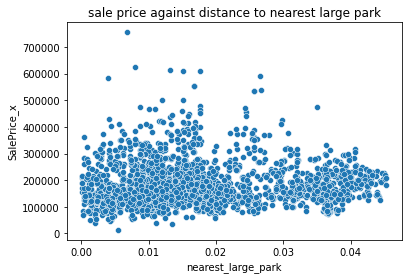

In [45]:
x = sns.scatterplot(df.nearest_large_park, df.SalePrice_x)
x.set_title('sale price against distance to nearest large park')

# explore by neighborhood

In [46]:
# define neighborhoods
# ontario = places[places['name'] == 'Ontario']
# somerset = places[places['name'] == 'Somerset']
# frederiksen = places[places['name'] == 'Frederiksen Court']
# uniondrive = places[places['name'] == 'Union Drive']
# richardson = places[places['name'] == 'Richardson Court']

In [47]:
df.Neighborhood_x.unique()

array(['SWISU', 'Edwards', 'IDOTRR', 'OldTown', 'NWAmes', 'Blmngtn',
       'Mitchel', 'NAmes', 'CollgCr', 'SawyerW', 'BrDale', 'Gilbert',
       'Timber', 'Somerst', 'NridgHt', 'BrkSide', 'NoRidge', 'Sawyer',
       'Crawfor', 'MeadowV', 'Greens', 'ClearCr', 'StoneBr', 'Veenker',
       'NPkVill'], dtype=object)

<AxesSubplot:>

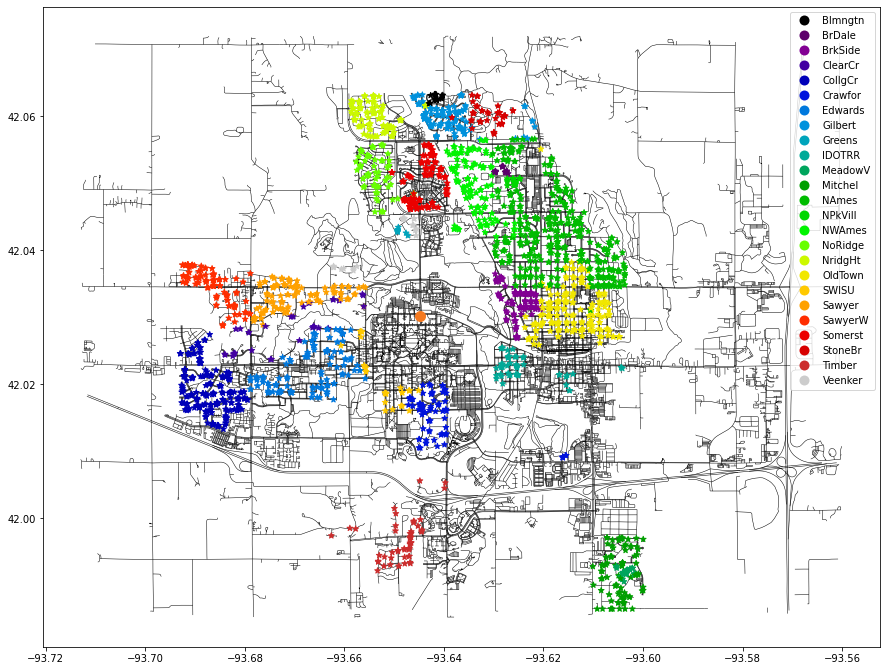

In [48]:
# first trying with coloring by neighborhood
fig,ax = plt.subplots(figsize=(15,15))
df.plot(ax=ax, marker='*', zorder=2, column=df['Neighborhood_x'], legend=True, cmap="nipy_spectral")
#waterways.plot(ax = ax, color='blue', linewidth=.3)
roads.plot(ax=ax, color='black', linewidth=0.5, zorder=1)
#railways.plot(ax = ax, color='red', zorder=1)
#places.plot(ax = ax, color='purple', column='type', legend=True)
#buildings.plot(ax = ax, color='blue')
#landuse.plot(ax = ax, color='purple')
#points.plot(ax = ax, color='black')
#nwater.plot(ax=ax, color='#65bbc7', zorder=1)
#nforest.plot(ax=ax, color='green', zorder=1)
#npark.plot(ax=ax, color='#8B0000', zorder=1)
ISU.plot(ax=ax, color = '#f47920', markersize=100, zorder=2)
# iowa_state_center.plot(ax=ax, color = '#f47920', markersize=100)
# ames_high.plot(ax=ax, color = '#f47920', markersize=100, categorical=True,
#              legend=True)

In [49]:
ex = df.copy()

In [50]:
ex['Neighborhood_x'].unique()

array(['SWISU', 'Edwards', 'IDOTRR', 'OldTown', 'NWAmes', 'Blmngtn',
       'Mitchel', 'NAmes', 'CollgCr', 'SawyerW', 'BrDale', 'Gilbert',
       'Timber', 'Somerst', 'NridgHt', 'BrkSide', 'NoRidge', 'Sawyer',
       'Crawfor', 'MeadowV', 'Greens', 'ClearCr', 'StoneBr', 'Veenker',
       'NPkVill'], dtype=object)

In [51]:
# create neighborhood dataframe organized by mean saleprice 
# this is redundant and done again later, probably delete this
neighborhood_df = ex.groupby('Neighborhood_x').mean().sort_values(by='SalePrice_x', ascending=False)
neighborhood_df

,MapRefNo,MA_Zip1,PID,SalePrice_x,lon,lat,nearest_park,ISU_distance,nearest_large_park
Neighborhood_x,,,,,,,,,
NoRidge,5.292067e+08,50013.761194,5.292067e+08,326114.298507,-93.653680,42.051504,0.005135,0.005135,0.006199
NridgHt,5.281461e+08,50010.069565,5.281461e+08,324712.278261,-93.653699,42.060045,0.003972,0.003972,0.014755
StoneBr,5.271921e+08,50010.088889,5.271921e+08,307627.577778,-93.631320,42.060166,0.004788,0.004788,0.023413
Veenker,5.330889e+08,50011.454545,5.330889e+08,255865.909091,-93.651639,42.041598,0.004026,0.004026,0.004157
Timber,9.169560e+08,50014.000000,9.169560e+08,243523.346154,-93.648399,41.996739,0.004514,0.004514,0.025593
Somerst,5.305731e+08,50010.113475,5.305731e+08,229869.822695,-93.644291,42.050031,0.002886,0.002886,0.007367
ClearCr,9.056030e+08,50013.757576,9.056030e+08,219918.181818,-93.671485,42.028456,0.006350,0.006350,0.022068
Crawfor,9.095005e+08,50016.805556,9.095005e+08,211185.208333,-93.640677,42.015288,0.003201,0.003201,0.011249
CollgCr,9.071289e+08,50013.947826,9.071289e+08,200337.078261,-93.686879,42.018949,0.003551,0.003551,0.039764


In [52]:
# group by neighborhood to get count and median_price of each neighborhood
neighborhood_df1 = ex.groupby('Neighborhood_x').agg({'MapRefNo':'count', 'SalePrice_x':'median'}).rename(columns={'MapRefNo':'count', 'SalePrice_x':'median_price'}).reset_index().sort_values(by='median_price', ascending=False)

In [64]:
neighborhood_df1.rename(columns = {'Neighborhood_x':"Neighborhood"})


,Neighborhood,count,median_price
16,NridgHt,115,316000.0
15,NoRidge,67,302000.0
22,StoneBr,45,278000.0
24,Veenker,22,257500.0
21,Somerst,141,226700.0
3,ClearCr,33,225000.0
23,Timber,52,220000.0
5,Crawfor,72,202067.5
4,CollgCr,230,200000.0
8,Greens,8,198000.0


<AxesSubplot:xlabel='median_price', ylabel='Neighborhood_x'>

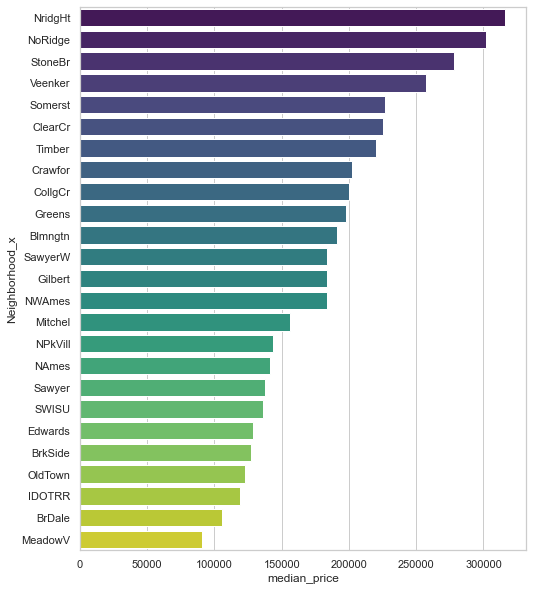

In [54]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 10))
sns.barplot(data=neighborhood_df1, x='median_price', y='Neighborhood_x', orient='h', palette='viridis')


In [55]:
# merge neighborhood dataframe back on to the houses dataframe to assign the median household price 
# of the neighborhood to each house in the neighborhood
dfnew = pd.merge(df, neighborhood_df1, left_on='Neighborhood_x', right_on='Neighborhood_x')

In [56]:
# reverse colomap for consistency
orig_map=plt.cm.get_cmap('viridis')
reversed_map = orig_map.reversed()

<AxesSubplot:>

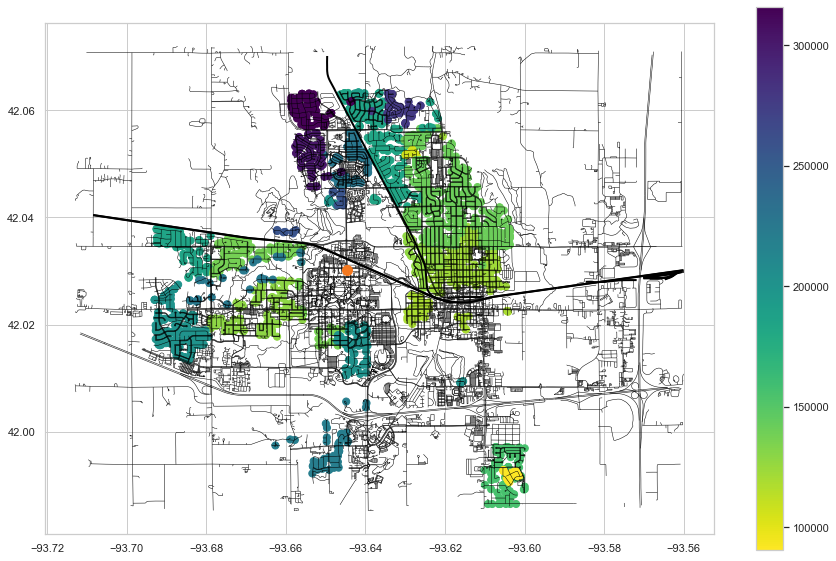

In [57]:
# coloring neighborhood by median neighborhood house price
fig,ax = plt.subplots(figsize=(15,10))
#dfnew.plot(ax=ax, marker='*', zorder=2, column='mean_price', colorbar=True)
dfnew.plot(column='median_price', ax=ax, legend=True, markersize=50, cmap=reversed_map)
#waterways.plot(ax = ax, color='blue', linewidth=.3)
roads.plot(ax=ax, color='black', linewidth=0.5, zorder=1)
railways.plot(ax = ax, color='black', zorder=1, linewidth=2)
#places.plot(ax = ax, color='purple', column='type', legend=True)
#buildings.plot(ax = ax, color='blue')
#landuse.plot(ax = ax, color='purple')
#points.plot(ax = ax, color='black')
#nwater.plot(ax=ax, color='#65bbc7', zorder=1)
#nforest.plot(ax=ax, color='green', zorder=1)
#npark.plot(ax=ax, color='#8B0000', zorder=1)
ISU.plot(ax=ax, color = '#f47920', markersize=100, zorder=2)
# iowa_state_center.plot(ax=ax, color = '#f47920', markersize=100)
# ames_high.plot(ax=ax, color = '#f47920', markersize=100, categorical=True,
#              legend=True)

## Questions for Luke


Project Goal:
__Perform a descriptive analysis of the Ames housing market with an emphasis on location. Used for buyers to assess realistic expectations of price for the features they want.__


1. help us clarify our goal for the project


2. multicolinearity (square footage/# of rooms - proximity to certain features/neighborhood)


3. handling null values and zeroes


4. within group analysis: validity of clustering houses into groups then running regressions within groups
        
        a. cluster based on median price brackets, neighborhoods, kmeans??

5. clever ways of assessing proximities as a feature

## Responses

1.


2. Log transform the y.  Lasso for feature selection. 

handling yr features, log


3. zeroes: use lasso for feature selection rather than splitting data into multiple gruops.

null: knn imputation (use similar variables to predict null value) or mean imputation


4. include proximity against price per square foot

census data for median income by neighborhood.  Use this to group neighborhoods.  Or use kmeans for clustering.  

Dummify neighborhood than use this to predict saleprice with lasso

what features differentiate the neighborhood/groups


5.cluster by kmeans including coordinates

maybe focus on two features, 
